# 💈 Introduction aux réseaux de neurones artificiels

### Imports



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from cycler import cycler
import warnings
warnings.filterwarnings("ignore")

import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

from itertools import product

### Functions



In [2]:
# Display all
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(df)

### Matplotlib setup



In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Data Loading



### Load Data



In [4]:
train = pd.read_csv('data/train.csv')

In [5]:
X = train.drop('MEDV', axis=1)
y = train['MEDV']

## Training



In [6]:
n_neurons = np.concatenate([np.arange(2,10), np.arange(10,30,2)])
hls = list(product(n_neurons, repeat=1))
#for n in range(len(n_neurons)):
#    hls[n] = (6,) + hls[n]
#    hls[n] = (6,8,) + hls[n]
#    hls[n] = (6,8,30,) + hls[n]
hls

[(2,),
 (3,),
 (4,),
 (5,),
 (6,),
 (7,),
 (8,),
 (9,),
 (10,),
 (12,),
 (14,),
 (16,),
 (18,),
 (20,),
 (22,),
 (24,),
 (26,),
 (28,)]

In [7]:
model = MLPRegressor(solver='lbfgs',
                     alpha=0.0001,
                     max_iter=10000,
                     random_state=0,
                     max_fun=15000,
                     verbose=False)

param_grid = {
    'hidden_layer_sizes': hls,
    'activation': ['relu']
}

greg = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, cv=3)
greg.fit(X, y)

/Users/lss/.pyenv/versions/miniforge3-4.10/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/lss/.pyenv/versions/miniforge3-4.10/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/lss/.pyenv/versions/miniforge3-4.10/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=3,
             estimator=MLPRegressor(max_iter=10000, random_state=0,
                                    solver='lbfgs'),
             n_jobs=6,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(2,), (3,), (4,), (5,), (6,),
                                                (7,), (8,), (9,), (10,), (12,),
                                                (14,), (16,), (18,), (20,),
                                                (22,), (24,), (26,), (28,)]})

In [8]:
results = pd.DataFrame(greg.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025957,0.000912,0.001220,0.000585,relu,"(2,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.799828,0.786654,0.800392,0.795625,0.006347,8
1,0.059188,0.024981,0.000872,0.000078,relu,"(3,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.808576,0.807939,0.830091,0.815536,0.010296,5
2,0.128796,0.111174,0.000721,0.000058,relu,"(4,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.868221,0.858926,0.784575,0.837241,0.037433,2
3,0.188554,0.040127,0.002013,0.000862,relu,"(5,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.840041,0.815708,0.818624,0.824791,0.010849,3
4,0.228060,0.029775,0.001288,0.000696,relu,"(6,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.837083,0.836050,0.852443,0.841859,0.007496,1
5,0.276307,0.113693,0.000714,0.000028,relu,"(7,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.848740,0.768861,0.816847,0.811483,0.032830,6
6,0.254691,0.118871,0.000704,0.000023,relu,"(8,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.865375,0.749041,0.840419,0.818278,0.050007,4
7,0.212165,0.059337,0.001531,0.000622,relu,"(9,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.821929,0.774000,0.798388,0.798105,0.019568,7
8,0.317482,0.177431,0.000718,0.000061,relu,"(10,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.813162,0.669149,0.852311,0.778207,0.078755,10
9,0.569526,0.092146,0.001056,0.000496,relu,"(12,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.759588,0.780152,0.784167,0.774636,0.010766,11


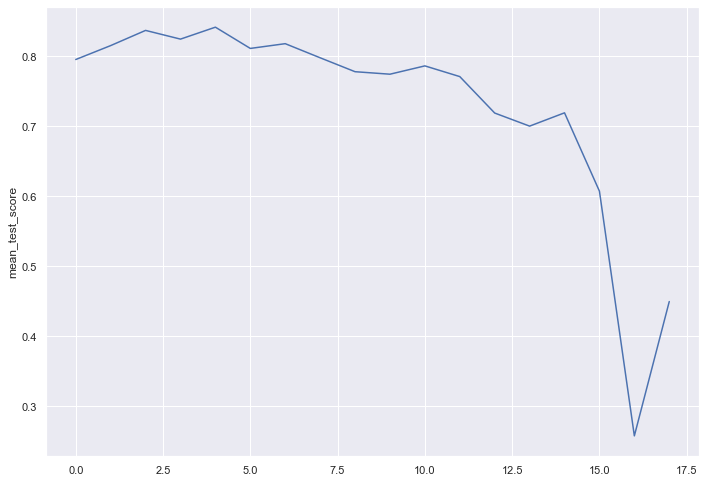

In [9]:
sns.lineplot(x=results.index, y=results.mean_test_score)
plt.show()

## Evaluation



In [10]:
y_predict = greg.best_estimator_.predict(X)
rmse = (np.sqrt(mean_squared_error(y, y_predict)))
r2 = r2_score(y, y_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 2.24436359749813
R2 score is 0.9418504932230022




## Save best model



In [11]:
with open('data/model.pkl', 'wb') as file:
    pickle.dump(greg.best_estimator_, file)

## Bibliography




[perceptrons.bib](perceptrons.bib)

